# Sampling Methods

### Learning Goals

- Brief introduction to sklearn.
- Generate synthetic data to test algorithms.
- Understand Random Walk and Monte Carlo Simulation.
- Understand Bootstrap Sampling.

## Part I. SKLEARN and Data Generation


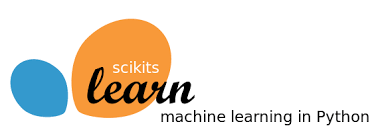

# scikit-learn

**Machine Learning in Python**
- https://scikit-learn.org/stable/
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.datasets import make_blobs

## `make_blobs()`
- This function generates isotropic Gaussian blobs for clustering and classification problems, similar to the ones we earlier saw with Naive Bayes Algorithm. 
- Official documentation for this function can be found [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

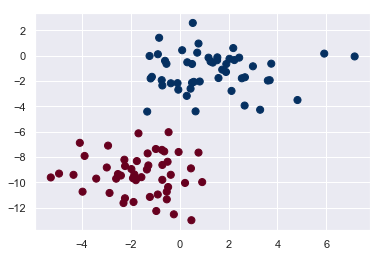

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

 ## `make_regression()`

- This function allows you to create datasets which can be used to test regression algorithms for linear regression. 
- We can create datasets by setting number of samples, number of input features, level of noise, and much more. 
- Here is how we import this function:

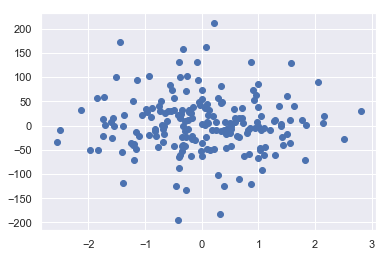

In [9]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2,n_targets=2, noise=0.6)

# plot regression dataset
plt.scatter(X,y)
plt.show()

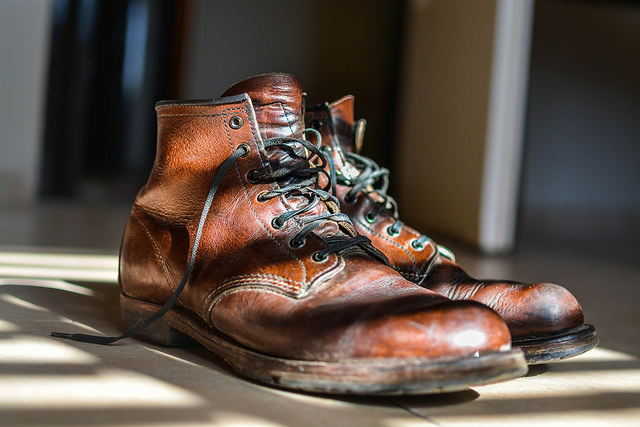

## Part II. Boostrap Sampling 


### What is Bootstrap Sampling?

- The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.
- Iteratively resampling a dataset with replacement.

### Boostrap Alogrithm

1. Choose a number of bootstrap samples to perform
2. Choose a sample size
3. For each bootstrap sample  
    a. Draw a sample with replacement with the chosen size  
    b. Calculate the statistic on the sample
4. Calculate the mean of the calculated sample statistics.

### Note
- We have to determine sample size and number of repitions to perform.
- **The samples not included in a given sample are called the out-of-bag samples, or OOB for short.** Will be useful when it is time to test Machine Learning Algos.

### Illustration

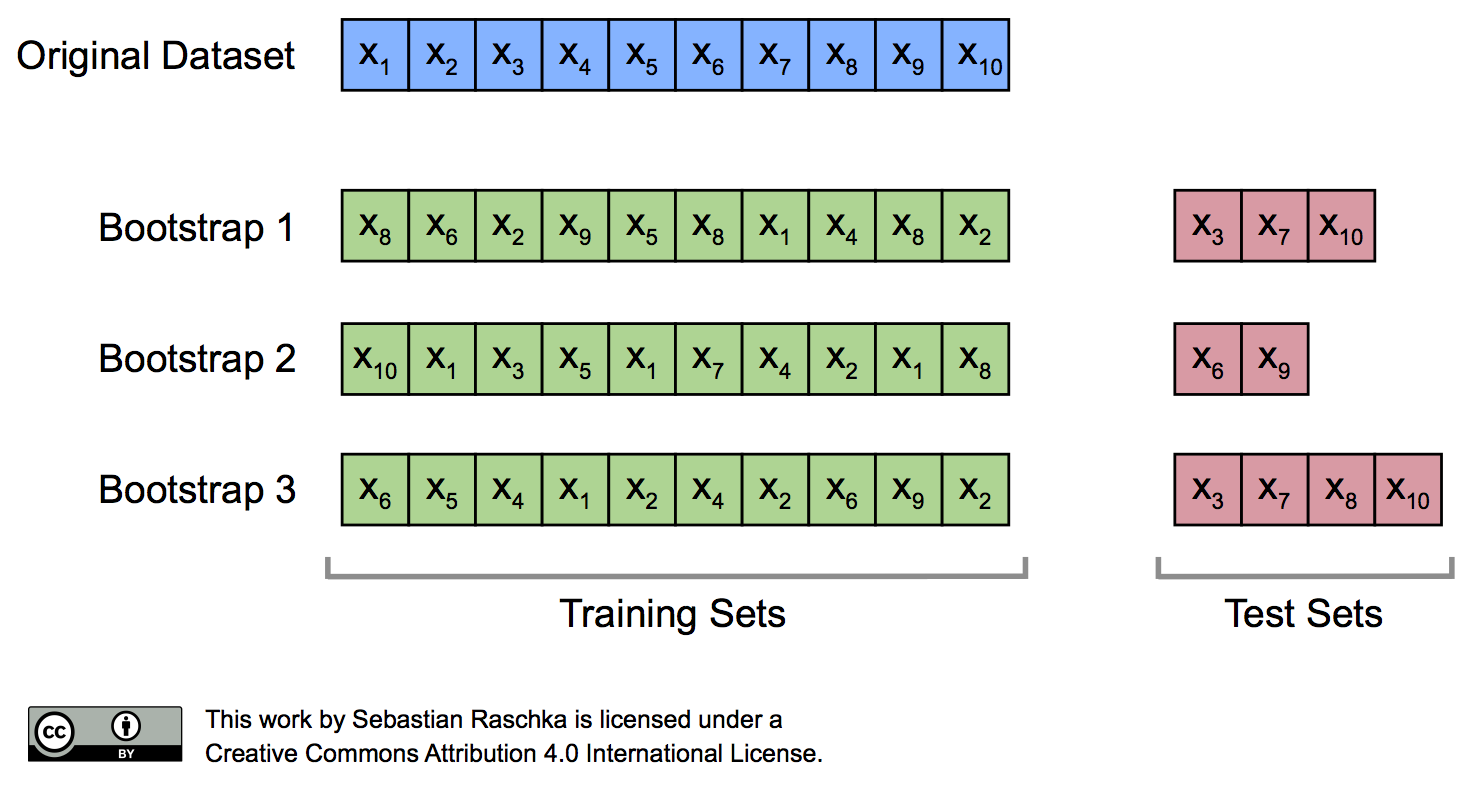

In [23]:
# scikit-learn bootstrap
from sklearn.utils import resample
# data sample
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,10,10]
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=20, random_state=10)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [10, 5, 1, 2, 10, 10, 1, 2, 10, 9, 10, 1, 10, 9, 7, 5, 4, 1, 5, 10]
OOB Sample: [3, 6, 8]


### Why is Bootstrapping Important?

- Used in ensemble methods.
- Foundation for state of the art Machine Learning Algorithms, such as  **Random Forest and XGBOOST**.
- Obtain a test set for "free" so no need for cross-validation.

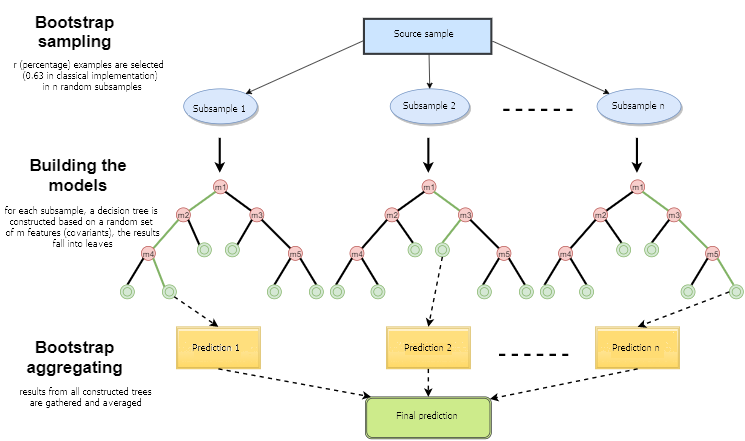

## Part III. Markov Chain Monte Carlo (MCMC)

###  What is Markov Chain Monte Carlo?


- Popular method for obtaining information about distributions, especially for estimating posterior distributions in Bayesian inference. 
-  subset of a class of models called Monte Carlo.

Two major components of MCMC are the **Monte Carlo Method** and **Markov Chain property**. 

- Markov Chain – where we go next only depends on our last
state (the Markov property).
- Monte Carlo – just simulating data.

### 3.1 Monte Carlo

- Monte Carlo can be used for estimating a parameter by randomly simulating values repeatedly. 
- Monte Carlo is the practice of estimating the properties of a distribution by examining random samples from the distribution. 

### Example
Instead of finding the mean of a normal distribution by directly calculating it from the distribution’s equations, a Monte–Carlo approach would be to draw a large number of random samples from a normal distribution, and calculate the sample mean of the samples.

### Illustration
- https://www.youtube.com/watch?v=BfS2H1y6tzQ

## 3.2 Markov Chain

- The Markov chain property of MCMC is the idea that the random samples are generated by a special sequential process. 
- Each random sample is used as a stepping stone to generate the next random sample (hence the chain).
- **A special property of the chain is that, while each new sample depends on the one before it, new samples do not depend on any samples before the previous one (this is the “Markov” property).**

### Example
- Rain today most depends on if it rained yesterday not 12 days ago.

### Put together
- MCMC is a method that repeatedly draws random values for the parameters of a distribution based on the current values. 
- Each sample of values is random, but the choices for the values are limited by the current state and the assumed prior distribution of the parameters.

### Example of MCMC
- [learnco](https://learn.co/tracks/data-science-career-v2/module-3-probability-sampling-and-ab-testing/section-24-resampling-and-monte-carlo-simulation/monte-carlo-simulations)

**Advantages:**
- works for complicated distributions in high-dimensional spaces, even when we don’t know where the regions of high probability are
- relatively easy to implement
- fairly reliable



**Disadvantages:**
- slower than other Monte Carlo or importance sampling (i.e., requires more samples for the same level of accuracy)
- can be very difficult to assess accuracy and evaluate convergence, even empirically